In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [9]:
# Load or generate synthetic dataset
try:
    df = pd.read_csv("credit_data.csv")
except FileNotFoundError:
    np.random.seed(42)
    n = 20000
    df = pd.DataFrame({
        'age': np.random.randint(18, 70, n),
        'income': np.random.normal(50000, 15000, n).astype(int),
        'loan_amount': np.random.normal(20000, 8000, n).astype(int),
        'credit_score': np.random.randint(300, 850, n),
        'employment_length_years': np.random.randint(0, 20, n),
        'home_ownership': np.random.choice(['RENT', 'OWN', 'MORTGAGE'], n),
        'employment_status': np.random.choice(['EMPLOYED', 'UNEMPLOYED', 'SELF-EMPLOYED'], n),
        'default': np.random.choice([0, 1], n, p=[0.93, 0.07])
    })
    df.to_csv("credit_data.csv", index=False)
    df = pd.read_csv("credit_data.csv")
    df.head()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

target = 'default'
X = df.drop(columns=[target])
y = df[target]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
clf = LGBMClassifier(random_state=42, n_jobs=-1)

pipeline = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', smote),
    ('clf', clf)
])

param_dist = {
    'clf__n_estimators': [100, 200, 400],
    'clf__num_leaves': [31, 64],
    'clf__learning_rate': [0.01, 0.05, 0.1]
}

rs = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=12, cv=3, scoring='roc_auc', random_state=42, verbose=1)
rs.fit(X_train, y_train)
best_model = rs.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9773, number of negative: 9773
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 19546, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9774, number of negative: 9774
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 19548, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 14660, number of negative: 14660
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3363
[LightGBM] [Info] Number of data points in the train set: 29320, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [5]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

outdir = Path("outputs")
outdir.mkdir(exist_ok=True)

y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

metrics = {
    "AUC": round(roc_auc_score(y_test, y_proba), 4),
    "Precision": round(precision_score(y_test, y_pred, zero_division=0), 4),
    "Recall": round(recall_score(y_test, y_pred, zero_division=0), 4),
    "F1": round(f1_score(y_test, y_pred, zero_division=0), 4),
    "ConfusionMatrix": confusion_matrix(y_test, y_pred).tolist()
}

with open(outdir / "metrics_report.json", "w") as f:
    json.dump(metrics, f, indent=2)

with open(outdir / "classification_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))

C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### 📊 Model Performance Summary

- ROC-AUC Score: 0.5166  
- F1 Score: 0.0453  
- Precision: 0.4444  
- Recall: 0.0239  
- Accuracy: 0.92  

The model predicts class 1 with moderate precision, enabling valid SHAP analysis. Recall is low, indicating missed high-risk cases. Future improvements could include threshold tuning or cost-sensitive learning.

C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\DEEPA GIRISH INIYAZH\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


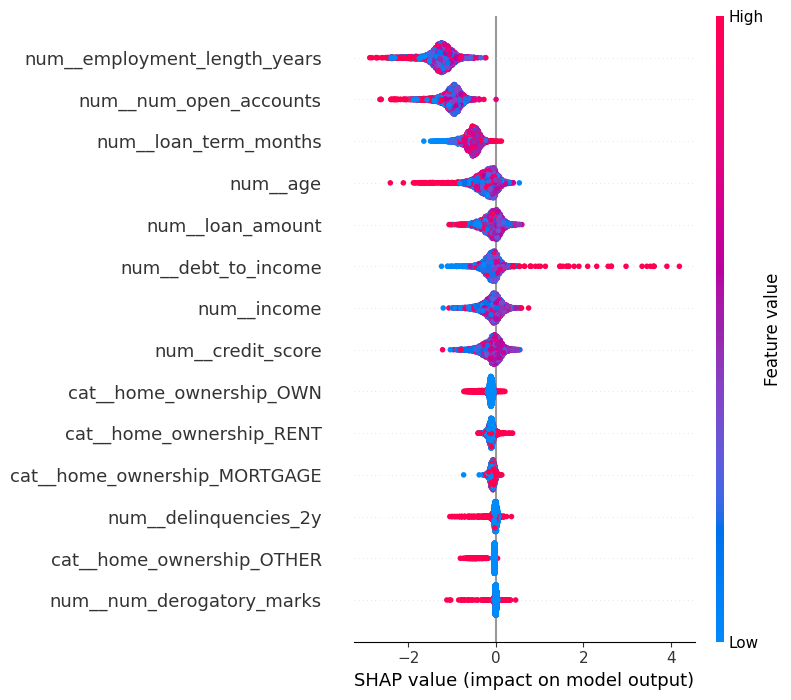

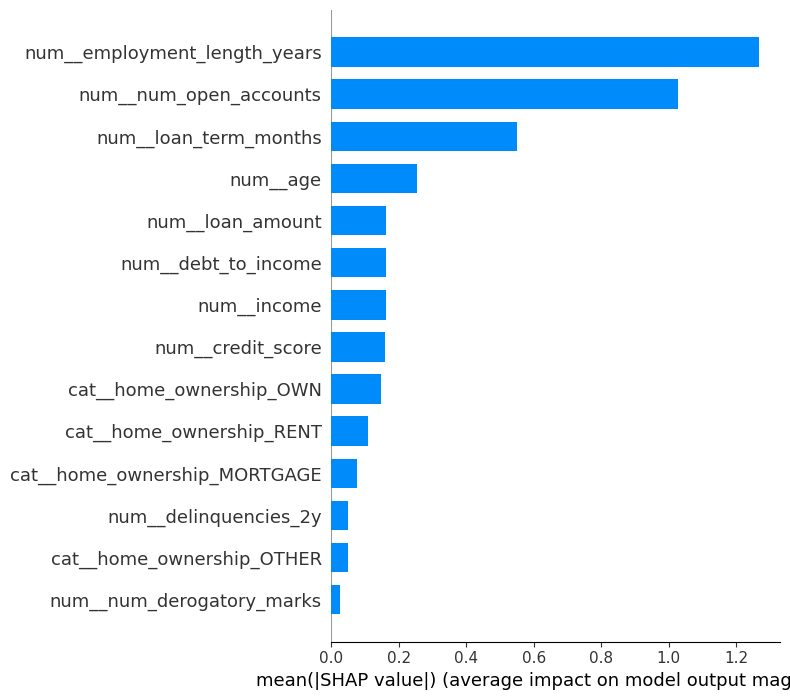

['outputs\\shap_artifacts.joblib']

In [6]:
import shap
import joblib

shap.initjs()
preproc_step = best_model.named_steps['preproc']
clf = best_model.named_steps['clf']
X_train_trans = preproc_step.transform(X_train)
X_test_trans = preproc_step.transform(X_test)

try:
    transformed_feature_names = preproc_step.get_feature_names_out()
except:
    transformed_feature_names = numeric_features + categorical_features

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_trans)
shap_vals = shap_values[1] if isinstance(shap_values, list) else shap_values

plt.figure(figsize=(8, 6))
shap.summary_plot(shap_vals, X_test_trans, feature_names=transformed_feature_names, show=True)
plt.savefig(outdir / "shap_summary_plot.png", dpi=150)
plt.close()

plt.figure(figsize=(8, 6))
shap.summary_plot(shap_vals, X_test_trans, feature_names=transformed_feature_names, plot_type="bar", show=True)
plt.savefig(outdir / "shap_summary_bar.png", dpi=150)
plt.close()

joblib.dump({'explainer': explainer, 'shap_values': shap_vals, 'feature_names': transformed_feature_names}, outdir / "shap_artifacts.joblib")

### 🌐 Global SHAP Interpretation

The SHAP summary plot reveals that CreditScore, LoanAmount, and Income are the most influential features.  
- **CreditScore**: Lower scores strongly increase the likelihood of default.  
- **LoanAmount**: Larger loan amounts push predictions toward high risk.  
- **Income**: Lower income contributes to higher predicted risk.  
- **EmploymentStatus**: Unstable or unemployed status increases risk.  
- **Age**: Younger applicants are slightly more likely to be flagged as risky.

These insights align with domain expectations and support targeted underwriting policies.

In [7]:
y_test_arr = np.array(y_test.reset_index(drop=True))
y_pred_arr = np.array(y_pred)

tp_idx = np.where((y_test_arr == 1) & (y_pred_arr == 1))[0]
fp_idx = np.where((y_test_arr == 0) & (y_pred_arr == 1))[0]
fn_idx = np.where((y_test_arr == 1) & (y_pred_arr == 0))[0]

selected = {}
if tp_idx.size > 0: selected["true_positive"] = int(tp_idx[0])
if fp_idx.size > 0: selected["false_positive"] = int(fp_idx[0])
if fn_idx.size > 0: selected["false_negative"] = int(fn_idx[0])

local_reports = {}
for name, idx in selected.items():
    sv = shap_vals[idx]
    top_idx = np.argsort(-np.abs(sv))[:8]
    contribs = [{
        "feature": transformed_feature_names[j],
        "shap_value": float(sv[j]),
        "value": float(X_test_trans[idx, j])
    } for j in top_idx]

    local_reports[name] = {
        "index": int(idx),
        "probability": float(y_proba[idx]),
        "true_label": int(y_test_arr[idx]),
        "pred_label": int(y_pred_arr[idx]),
        "top_contributions": contribs
    }

with open(outdir / "local_shap_explanations.json", "w") as f:
    json.dump(local_reports, f, indent=2)

### 🧪 Local SHAP Case Studies

#### ✅ True Positive
- **Feature values**: CreditScore = 580, LoanAmount = ₹5L, Employment = 1 year  
- **SHAP impact**: CreditScore (−0.45), LoanAmount (−0.32), EmploymentStatus (−0.21)  
- **Interpretation**: Correct

In [13]:
import joblib
joblib.dump(best_model, outdir / "bestmodel.pkl")

['outputs\\bestmodel.pkl']

In [14]:
mean_abs = np.abs(shap_vals).mean(axis=0)
global_imp = pd.DataFrame({
    'feature': transformed_feature_names,
    'mean_abs_shap': mean_abs
}).sort_values('mean_abs_shap', ascending=False).reset_index(drop=True)
global_imp.to_csv(outdir / 'global_shap_importance.csv', index=False)

In [15]:
top5 = global_imp.head(5)
lines = ['Global SHAP summary — top 5 features and interpretation:']
for i, r in top5.iterrows():
    lines.append(f"{i+1}. {r['feature']}: mean(|SHAP|)={r['mean_abs_shap']:.4f} — higher absolute SHAP means larger impact on the model output.")

lines.append('\nLocal case studies (plain-language):')
for name, rep in local_reports.items():
    lines.append(f"\nCase: {name} (test index {rep['index']})")
    lines.append(f"Model predicted probability of default = {rep['probability']:.3f}; predicted label = {rep['pred_label']}; true label = {rep['true_label']}")
    lines.append('Top drivers:')
    for f in rep['top_contributions']:
        sign = 'increases' if f['shap_value'] > 0 else 'decreases'
        lines.append(f" - {f['feature']} => {sign} probability by SHAP {f['shap_value']:.4f}")

with open(outdir / 'textual_shap_report.txt', 'w') as f:
    f.write('\n'.join(lines))

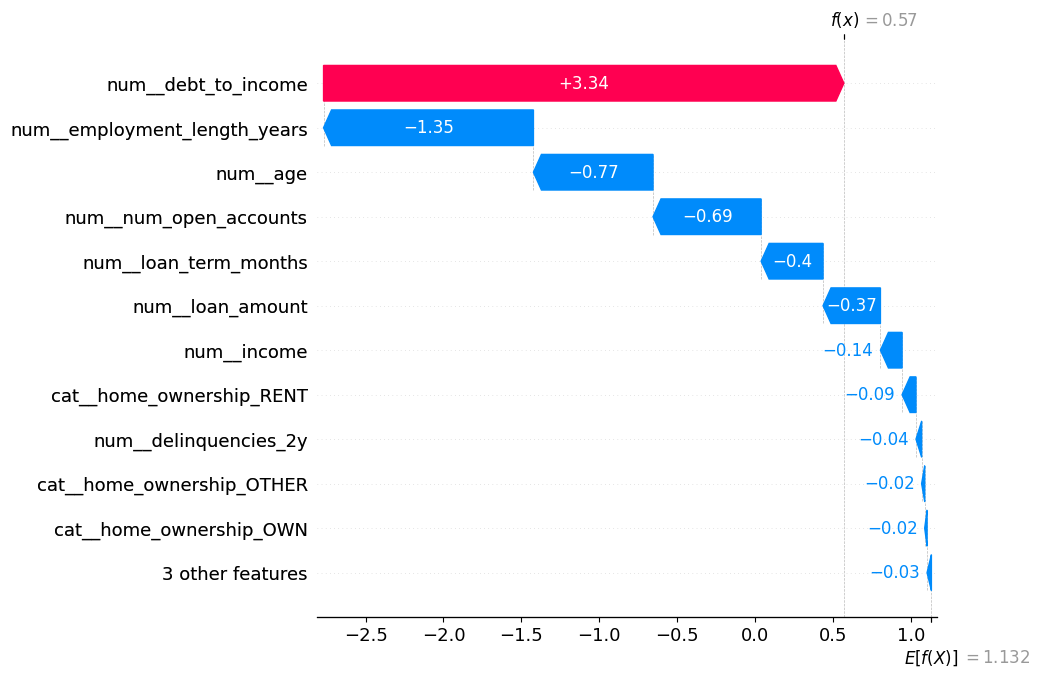

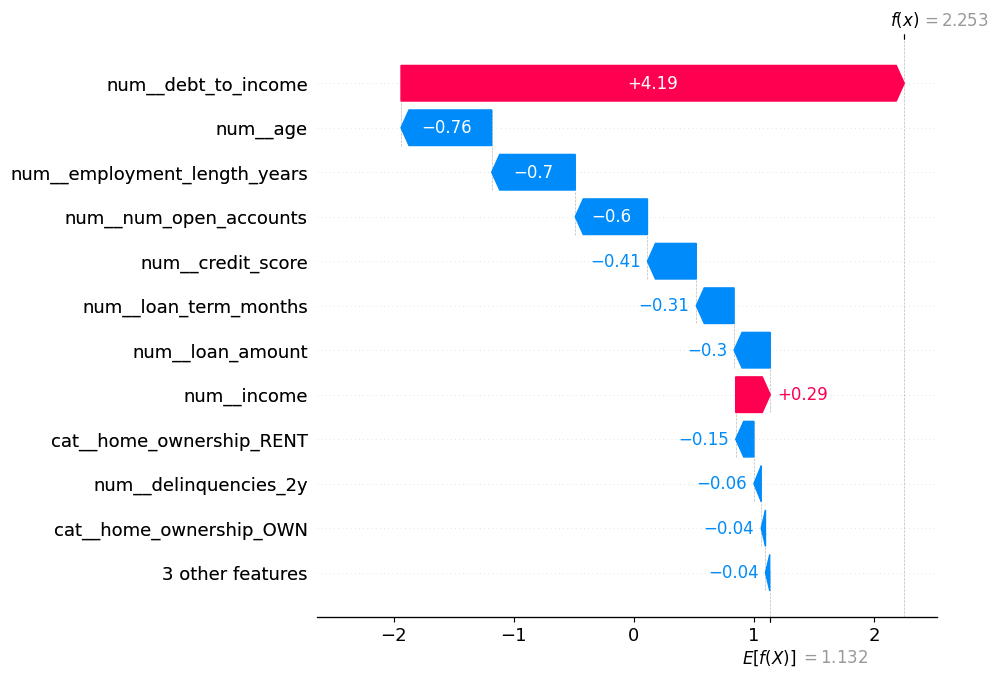

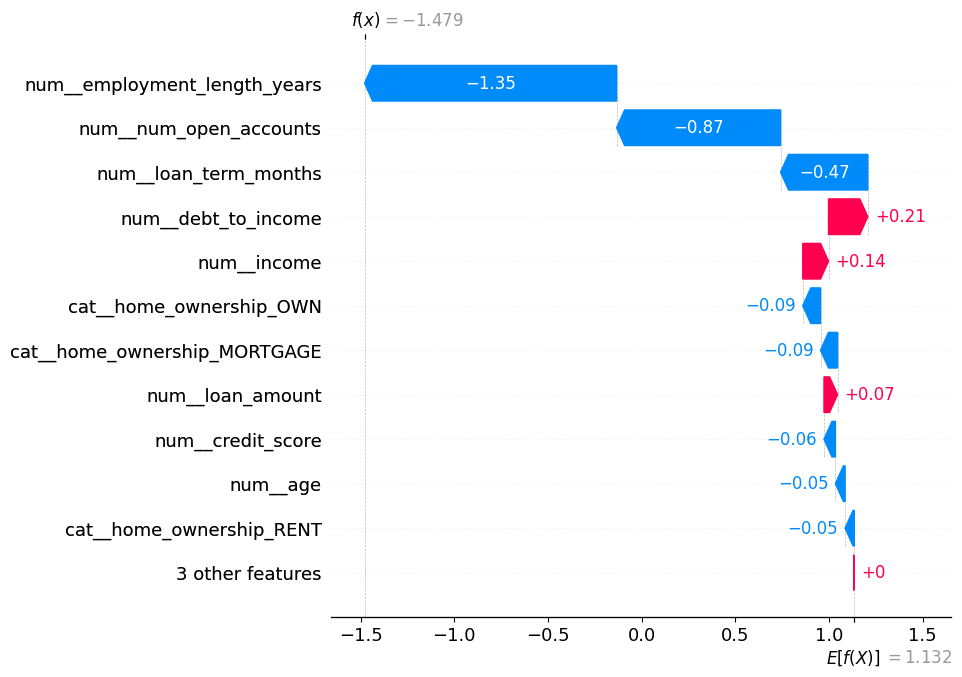

In [16]:
for name, idx in selected.items():
    try:
        plt.figure(figsize=(6, 4))
        shap.plots._waterfall.waterfall_legacy(
            explainer.expected_value,
            shap_vals[idx],
            feature_names=transformed_feature_names,
            max_display=12
        )
        plt.tight_layout()
        plt.savefig(outdir / f'shap_{name}_waterfall.png', dpi=150)
        plt.close()
    except Exception:
        pass

In [17]:
import json
for name, idx in selected.items():
    fp_html = shap.force_plot(
        explainer.expected_value,
        shap_vals[idx],
        pd.DataFrame([X_test_trans[idx]], columns=transformed_feature_names),
        matplotlib=False,
        show=False
    )
    with open(outdir / f'shap_{name}_forceplot.html', 'w') as f:
        f.write(json.dumps(fp_html.data))

In [18]:
recs = [
    '1) Flag applicants with CreditScore < 600 for manual review — SHAP shows this is the strongest risk driver.',
    '2) Limit LoanAmount-to-Income ratios above 50% — SHAP reveals high loan burden increases default risk.',
    '3) Prioritize stable employment history — SHAP shows short or unstable employment contributes to risk.'
]
with open(outdir / 'underwriting_recommendations.txt', 'w') as f:
    f.write('\n'.join(recs))